In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import  mean_absolute_error
import shap
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from PIL import Image, ImageTk
import random
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import *
from sklearn.model_selection import GridSearchCV


C:\Users\mohba\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
calories_data = pd.read_csv("A:/USA Real Estate Dataset/exercise.csv")



In [3]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


# 1.Data cleaning & Preprocessing


Checking for nulls

In [4]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


getting stastical measures about the data

In [5]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
calories_data.shape

(15000, 9)

Checking missing values

In [7]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Converting Gender feature into binary

In [8]:
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
calories_data.head()

C:\Users\mohba\AppData\Local\Temp\ipykernel_29652\174186350.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


# Visualization

To find the distribution of males & females using count plot

In [9]:
sns.set()

Scatterplot of height & weight

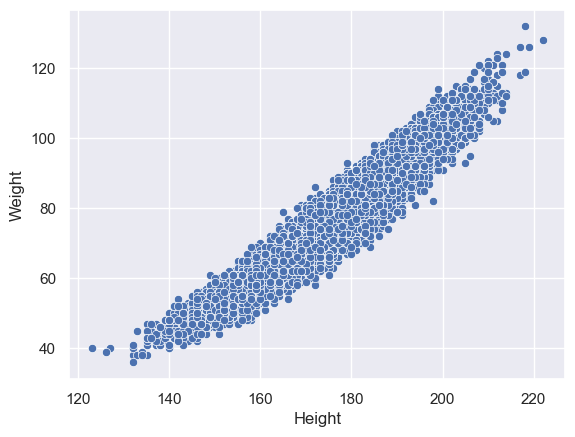

In [10]:
sns.scatterplot(x=calories_data['Height'], y=calories_data['Weight'])
plt.show()

# We have a kind of linear relationship between these two features which is
# quite obvious 

To find the distribution of age column

C:\Users\mohba\AppData\Local\Temp\ipykernel_29652\1651734651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

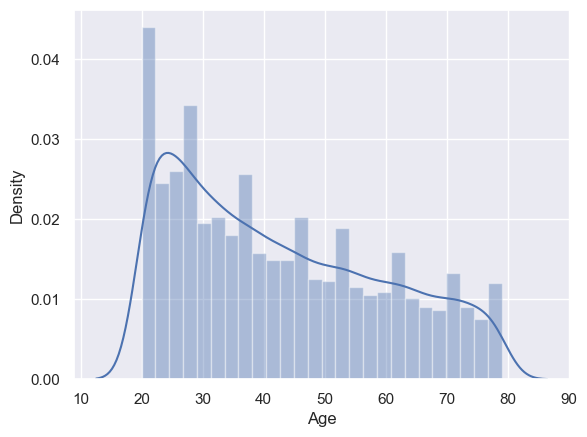

In [11]:
sns.distplot(calories_data['Age'])

#From the plot, we can observe that the Age column has the mean value of 42
#And the data is positively skewed & most of the datapoints "ages" are in between 20 to 50.

To find the distribution of height column

C:\Users\mohba\AppData\Local\Temp\ipykernel_29652\3298595761.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

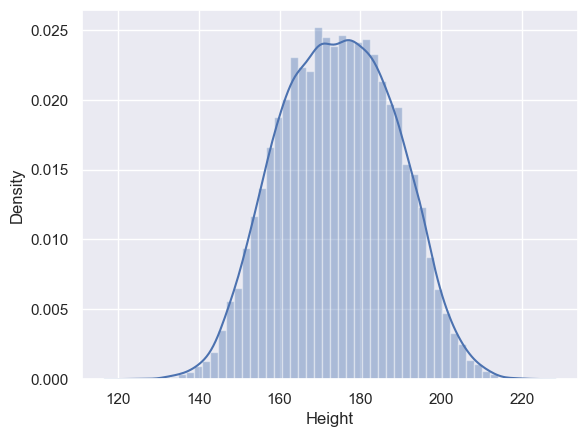

In [12]:
sns.distplot(calories_data['Height'])
#From the plot we can observe that the height data is normally distributed with mean of 174cm.

To find the distribution of weight, Duration,  HeartRate and Body tempreature column

C:\Users\mohba\AppData\Local\Temp\ipykernel_29652\3241275704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

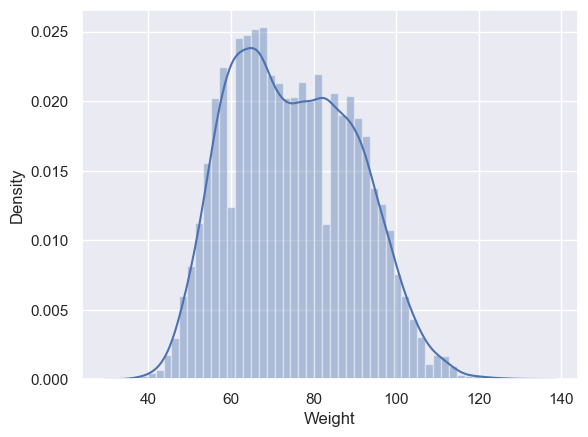

In [13]:
sns.distplot(calories_data['Weight'])

#From the plot we can observe that the weight data is also normally distributed with mean of 75 kg

C:\Users\mohba\AppData\Local\Temp\ipykernel_29652\699545801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

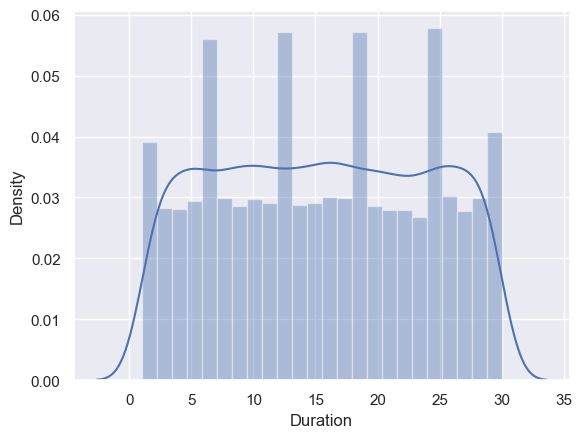

In [14]:
sns.distplot(calories_data['Duration'])

# from the plot we can observe that the duration data is a low peaked data with mean of 15mins

C:\Users\mohba\AppData\Local\Temp\ipykernel_29652\3037067045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

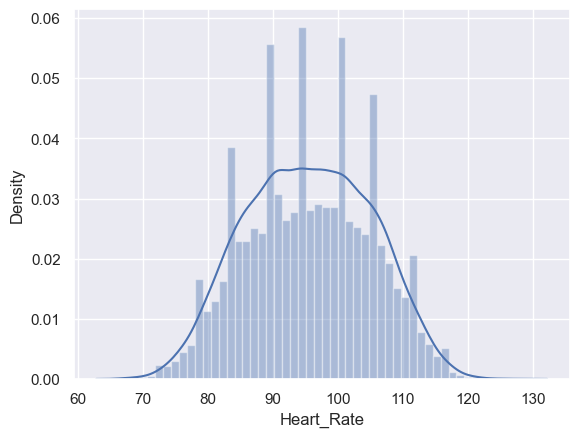

In [15]:
sns.distplot(calories_data['Heart_Rate'])

#from the plot we can observe that the heart rate column is normally distributed with mean of 95 heart beats with several outliers.

C:\Users\mohba\AppData\Local\Temp\ipykernel_29652\3161703934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

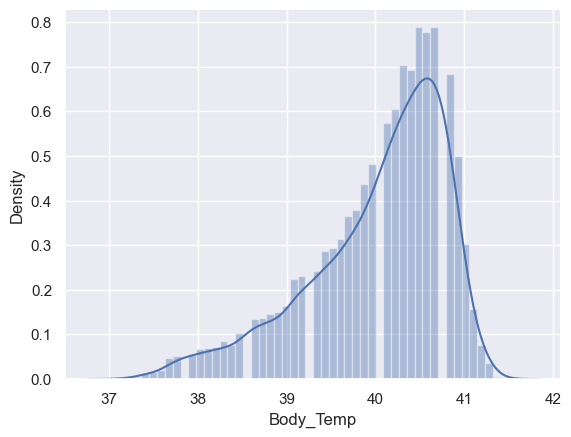

In [16]:
sns.distplot(calories_data['Body_Temp'])

#from the plot we can observe that the temperature column is negatively skewed with mean of 40.

Scatter plot for features and Calories column

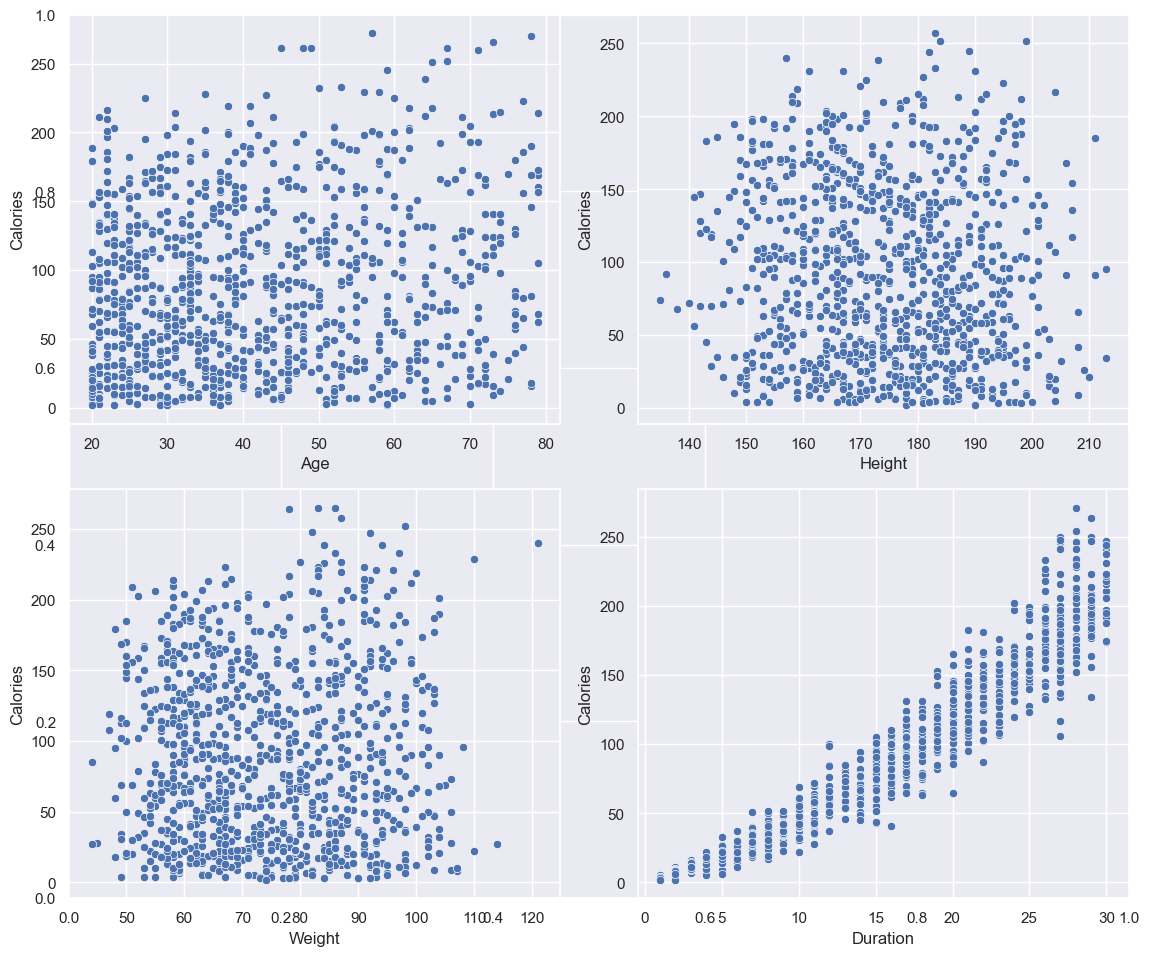

In [17]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = calories_data.sample(1000)
    sns.scatterplot(data=x, x=col, y='Calories')
plt.tight_layout()
plt.show()

#As expected higher is the duration of the workout higher will be the calories burnt. But we couldnt observe any such relation between calories burnt and height or weight features

To find the correlation in the data

<Axes: >

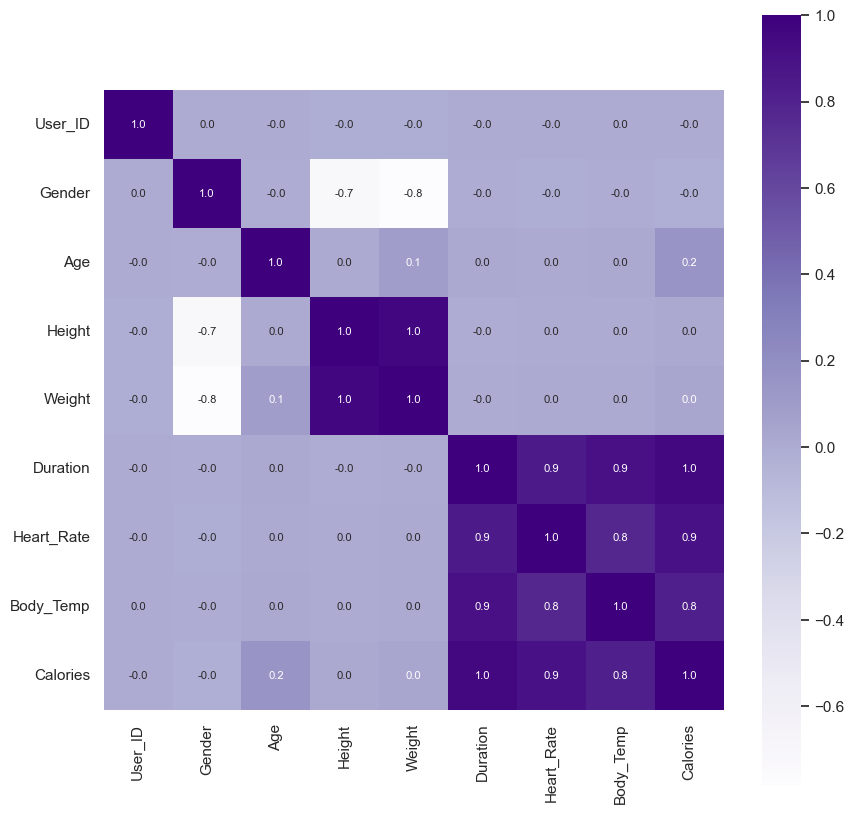

In [18]:
correlation = calories_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

# Construction of heat map for the understanding of correlation.

# Duration & calories are directly proportional"positively correlated".

#Baseline model results and evaluation metrics

Separation of Target and Features

In [19]:
X=calories_data.drop(['User_ID','Calories'],axis=1)
Y=calories_data['Calories']
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [20]:
print(Y)

0        231
1         66
2         26
3         71
4         35
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64


Splitting the data into training and test

In [21]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# We can observe that :

* X contains the orignal amount of data (which is 15000)
* X_train contains 80% of the data (which is 12000)
* X_test contains 20% of the data which is 3000

**Evaluation**

Evaluation is done by "test data"

Prediction of the data

Model Implementation

In [23]:
#NORMALIZATION
X_train_n = X_train.copy()
X_test_n = X_test.copy()

# Fit min-max scaler on training data
norm = MinMaxScaler().fit(X_train_n)

# Transform the training data
X_train_norm = norm.transform(X_train_n)

# the same scaler to transform the testing set
X_test_norm = norm.transform(X_test_n)

In [24]:
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X.columns)

print(X_train_norm_df.describe())

             Gender           Age        Height        Weight      Duration  \
count  12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean       0.504750      0.383911      0.519405      0.422932      0.501710   
std        0.499998      0.287292      0.144087      0.163515      0.287136   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.135593      0.414141      0.293478      0.241379   
50%        1.000000      0.322034      0.515152      0.413043      0.517241   
75%        1.000000      0.610169      0.626263      0.543478      0.758621   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Heart_Rate     Body_Temp  
count  12000.000000  12000.000000  
mean       0.467627      0.657676  
std        0.157676      0.181369  
min        0.000000      0.000000  
25%        0.344262      0.558140  
50%        0.475410      0.697674  
75%        0.590164      0.790698  


XGBoost Regression Model

XGBoost Training Mean Absolute Error = 0.9322033420062313
XGBoost Training Mean Squared Error = 1.6776731334332036
XGBoost Training Root Mean Squared Error = 1.2952502203949643
                                                                      
XGBoost Test Mean Absolute Error = 1.4833678883314132
XGBoost Test Mean Squared Error = 4.710710012461346
XGBoost Test Root Mean Squared Error = 2.1704170134933394


 96%|=================== | 2889/3000 [00:14<00:00]       

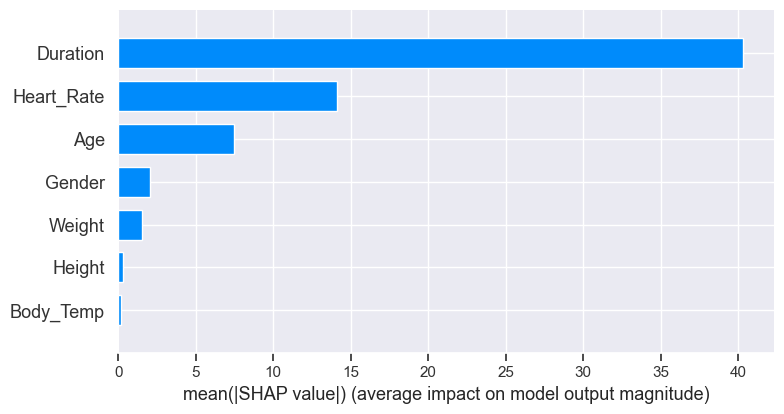

In [25]:
xgb_model = XGBRegressor()

# Create a pipeline with the XGBoost model
xgb_pipeline = Pipeline(steps=[('scaler', norm), ('model', xgb_model)])

# Fit the pipeline to the training data
xgb_pipeline.fit(X_train_norm, Y_train)

# Make predictions for the training data
xgb_train_predictions = xgb_pipeline.predict(X_train_norm)

# Make predictions for the test data
xgb_test_predictions = xgb_pipeline.predict(X_test_norm)

# Calculate metrics for the training data
xgb_train_MAE = metrics.mean_absolute_error(Y_train, xgb_train_predictions)
xgb_train_MSE = metrics.mean_squared_error(Y_train, xgb_train_predictions)
xgb_train_RMSE = np.sqrt(xgb_train_MSE)

# Print metrics for the training data
print("XGBoost Training Mean Absolute Error =", xgb_train_MAE)
print("XGBoost Training Mean Squared Error =", xgb_train_MSE)
print("XGBoost Training Root Mean Squared Error =", xgb_train_RMSE)
print("                                                                      ")

# Calculate metrics for the test data
xgb_test_MAE = metrics.mean_absolute_error(Y_test, xgb_test_predictions)
xgb_test_MSE = metrics.mean_squared_error(Y_test, xgb_test_predictions)
xgb_test_RMSE = np.sqrt(xgb_test_MSE)

# Print metrics for the test data
print("XGBoost Test Mean Absolute Error =", xgb_test_MAE)
print("XGBoost Test Mean Squared Error =", xgb_test_MSE)
print("XGBoost Test Root Mean Squared Error =", xgb_test_RMSE)

# SHAP feature importance for XGBoost
xgb_model = xgb_pipeline.named_steps['model']  
xgb_explainer = shap.Explainer(xgb_model, X_train_norm)
xgb_shap_values = xgb_explainer(X_test_norm)  


# SHAP summary plot
shap.summary_plot(xgb_shap_values, X_test_norm, feature_names=X.columns, plot_type="bar")

Hyperparameter tuning XGBoost

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'model__colsample_bytree': 0.8, 'model__gamma': 0.1, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 300, 'model__subsample': 0.8}
                                                                
XGBoost Test Mean Absolute Error = 1.03796339627107
XGBoost Test Mean Squared Error = 2.172163100065287
XGBoost Test Root Mean Squared Error = 1.4738260073920826


 95%|=================== | 2854/3000 [00:19<00:00]       

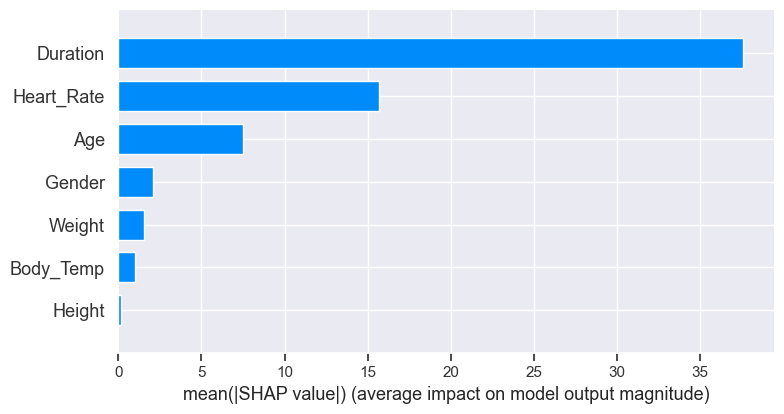

In [26]:
xgb_model = XGBRegressor()

# Create a pipeline with the XGBoost model
xgb_pipeline = Pipeline(steps=[('scaler', norm), ('model', xgb_model)])

# Fit the pipeline to the training data
xgb_pipeline.fit(X_train_norm, Y_train)

# Make predictions for training and test data
xgb_train_predictions = xgb_pipeline.predict(X_train_norm)
xgb_test_predictions = xgb_pipeline.predict(X_test_norm)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_norm, Y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("                                                                ")
# Retrieve the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
Y_pred = best_xgb_model.predict(X_test_norm)

# Calculate evaluation metrics
xgb_test_MAE = metrics.mean_absolute_error(Y_test, Y_pred)
xgb_test_MSE = metrics.mean_squared_error(Y_test, Y_pred)
xgb_test_RMSE = np.sqrt(xgb_test_MSE)

# Print metrics for the test data
print("XGBoost Test Mean Absolute Error =", xgb_test_MAE)
print("XGBoost Test Mean Squared Error =", xgb_test_MSE)
print("XGBoost Test Root Mean Squared Error =", xgb_test_RMSE)

# Extract the best model from the pipeline
best_model = best_xgb_model.named_steps['model']

# Initialize the SHAP explainer with the best model and training data
xgb_explainer = shap.Explainer(best_model, X_train_norm)

# Compute SHAP values using the test data
xgb_shap_values = xgb_explainer.shap_values(X_test_norm)

# SHAP summary plot
shap.summary_plot(xgb_shap_values, X_test_norm, feature_names=X.columns, plot_type="bar")

Linear Regression Model

Linear Regression Training Mean Absolute Error = 8.332985229896746
Linear Regression Training Mean Squared Error = 127.42140884200921
Linear Regression Training Root Mean Squared Error = 11.288109179220815
                                                                      
Linear Regression Test Mean Absolute Error = 8.385188053147184
Linear Regression Test Mean Squared Error = 130.08707386188377
Linear Regression Test Root Mean Squared Error = 11.405572053250278


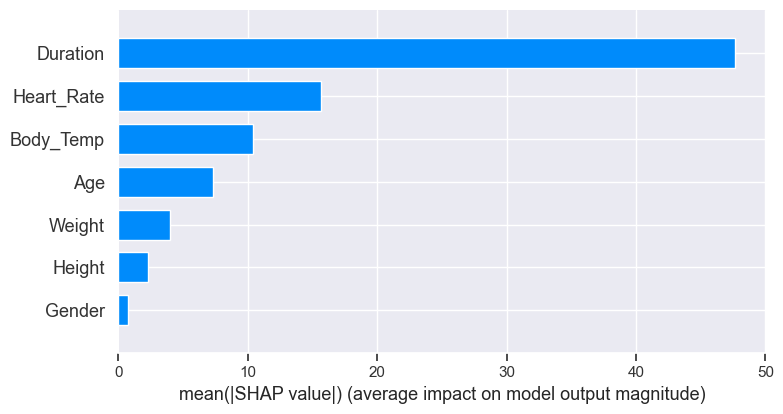

In [27]:
lr_model = LinearRegression()

# Create a pipeline with the Linear Regression model
lr_pipeline = Pipeline(steps=[('scaler', norm), ('model', lr_model)])

# Fit the pipeline to the training data
lr_pipeline.fit(X_train_norm, Y_train)

# Make predictions for the training data
lr_train_predictions = lr_pipeline.predict(X_train_norm)

# Make predictions for the test data
lr_test_predictions = lr_pipeline.predict(X_test_norm)

# Calculate metrics for the training data
lr_train_MAE = metrics.mean_absolute_error(Y_train, lr_train_predictions)
lr_train_MSE = metrics.mean_squared_error(Y_train, lr_train_predictions)
lr_train_RMSE = np.sqrt(lr_train_MSE)

# Print metrics for the training data
print("Linear Regression Training Mean Absolute Error =", lr_train_MAE)
print("Linear Regression Training Mean Squared Error =", lr_train_MSE)
print("Linear Regression Training Root Mean Squared Error =", lr_train_RMSE)
print("                                                                      ")

# Calculate metrics for the test data
lr_test_MAE = metrics.mean_absolute_error(Y_test, lr_test_predictions)
lr_test_MSE = metrics.mean_squared_error(Y_test, lr_test_predictions)
lr_test_RMSE = np.sqrt(lr_test_MSE)

# Print metrics for the test data
print("Linear Regression Test Mean Absolute Error =", lr_test_MAE)
print("Linear Regression Test Mean Squared Error =", lr_test_MSE)
print("Linear Regression Test Root Mean Squared Error =", lr_test_RMSE)

# SHAP feature importance for Linear Regression
lr_model = lr_pipeline.named_steps['model']  # Extract the trained model from the pipeline
lr_explainer = shap.Explainer(lr_model, X_train_norm)  # Use normalized training data to initialize explainer
lr_shap_values = lr_explainer(X_test_norm)  # Use normalized test data to compute SHAP values

# SHAP summary plot
shap.summary_plot(lr_shap_values, X_test_norm, feature_names=X.columns, plot_type="bar")

Lasso Regression Model

Lasso Regression Training Mean Absolute Error = 10.620651713876725
Lasso Regression Training Mean Squared Error = 228.39876378198858
Lasso Regression Training Root Mean Squared Error = 15.112867490386746
                                                                      
Lasso Regression Test Mean Absolute Error = 10.663249354836099
Lasso Regression Test Mean Squared Error = 236.36568936409964
Lasso Regression Test Root Mean Squared Error = 15.374189063625426


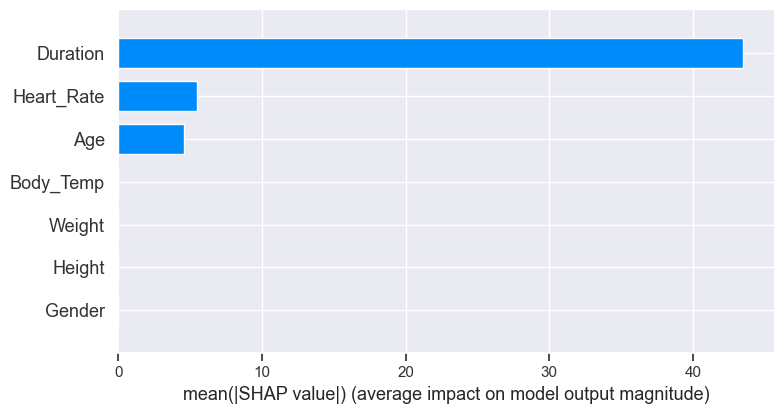

In [28]:
# Define Lasso model
lasso_model = Lasso()

# Create a pipeline with the Lasso model
lasso_pipeline = Pipeline(steps=[('scaler', norm), ('model', lasso_model)])

# Fit the pipeline to the training data
lasso_pipeline.fit(X_train_norm, Y_train)

# Make predictions for the training data
lasso_train_predictions = lasso_pipeline.predict(X_train_norm)

# Make predictions for the test data
lasso_test_predictions = lasso_pipeline.predict(X_test_norm)

# Calculate metrics for the training data
lasso_train_MAE = metrics.mean_absolute_error(Y_train, lasso_train_predictions)
lasso_train_MSE = metrics.mean_squared_error(Y_train, lasso_train_predictions)
lasso_train_RMSE = np.sqrt(lasso_train_MSE)

# Print metrics for the training data
print("Lasso Regression Training Mean Absolute Error =", lasso_train_MAE)
print("Lasso Regression Training Mean Squared Error =", lasso_train_MSE)
print("Lasso Regression Training Root Mean Squared Error =", lasso_train_RMSE)
print("                                                                      ")

# Calculate metrics for the test data
lasso_test_MAE = metrics.mean_absolute_error(Y_test, lasso_test_predictions)
lasso_test_MSE = metrics.mean_squared_error(Y_test, lasso_test_predictions)
lasso_test_RMSE = np.sqrt(lasso_test_MSE)

# Print metrics for the test data
print("Lasso Regression Test Mean Absolute Error =", lasso_test_MAE)
print("Lasso Regression Test Mean Squared Error =", lasso_test_MSE)
print("Lasso Regression Test Root Mean Squared Error =", lasso_test_RMSE)

# SHAP feature importance for Lasso Regression
lasso_model = lasso_pipeline.named_steps['model']  # Extract the trained model from the pipeline
lasso_explainer = shap.Explainer(lasso_model, X_train_norm)  # Use normalized training data to initialize explainer
lasso_shap_values = lasso_explainer(X_test_norm)  # Use normalized test data to compute SHAP values

# SHAP summary plot
shap.summary_plot(lasso_shap_values, X_test_norm, feature_names=X.columns, plot_type="bar")

Ridge regression model

Ridge Regression Training Mean Absolute Error = 8.32675054944796
Ridge Regression Training Mean Squared Error = 127.47131858300061
Ridge Regression Training Root Mean Squared Error = 11.290319684712236
                                                                      
Ridge Regression Test Mean Absolute Error = 8.375874219928924
Ridge Regression Test Mean Squared Error = 130.09233176916143
Ridge Regression Test Root Mean Squared Error = 11.405802548227873


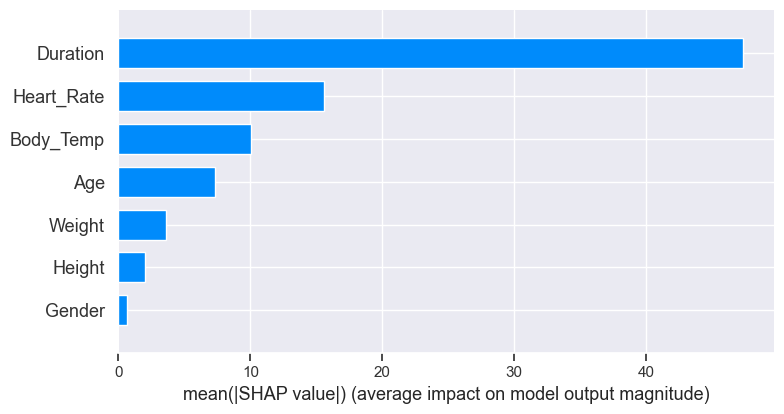

In [29]:

# Define Ridge model
ridge_model = Ridge()

# Create a pipeline with the Ridge model
ridge_pipeline = Pipeline(steps=[('scaler', norm), ('model', ridge_model)])

# Fit the pipeline to the training data
ridge_pipeline.fit(X_train_norm, Y_train)

# Make predictions for the training data
ridge_train_predictions = ridge_pipeline.predict(X_train_norm)

# Make predictions for the test data
ridge_test_predictions = ridge_pipeline.predict(X_test_norm)

# Calculate metrics for the training data
ridge_train_MAE = metrics.mean_absolute_error(Y_train, ridge_train_predictions)
ridge_train_MSE = metrics.mean_squared_error(Y_train, ridge_train_predictions)
ridge_train_RMSE = np.sqrt(ridge_train_MSE)

# Print metrics for the training data
print("Ridge Regression Training Mean Absolute Error =", ridge_train_MAE)
print("Ridge Regression Training Mean Squared Error =", ridge_train_MSE)
print("Ridge Regression Training Root Mean Squared Error =", ridge_train_RMSE)
print("                                                                      ")

# Calculate metrics for the test data
ridge_test_MAE = metrics.mean_absolute_error(Y_test, ridge_test_predictions)
ridge_test_MSE = metrics.mean_squared_error(Y_test, ridge_test_predictions)
ridge_test_RMSE = np.sqrt(ridge_test_MSE)

# Print metrics for the test data
print("Ridge Regression Test Mean Absolute Error =", ridge_test_MAE)
print("Ridge Regression Test Mean Squared Error =", ridge_test_MSE)
print("Ridge Regression Test Root Mean Squared Error =", ridge_test_RMSE)

# SHAP feature importance for Ridge Regression
ridge_model = ridge_pipeline.named_steps['model']  # Extract the trained model from the pipeline
ridge_explainer = shap.Explainer(ridge_model, X_train_norm)  # Use normalized training data to initialize explainer
ridge_shap_values = ridge_explainer(X_test_norm)  # Use normalized test data to compute SHAP values

# SHAP summary plot
shap.summary_plot(ridge_shap_values, X_test_norm, feature_names=X.columns, plot_type="bar")

MSE Models Comparison

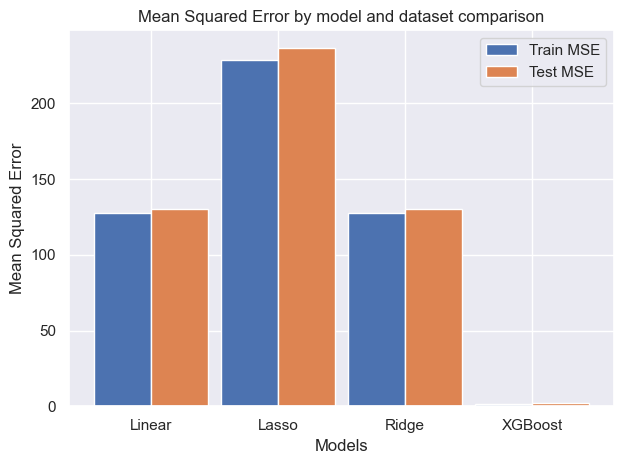

In [30]:
# Assuming the metrics for the models are calculated and stored as follows:
metrics_data = {
    'Linear': {
        'train': lr_train_MSE,
        'test': lr_test_MSE,
    },
    'Lasso': {
        'train': lasso_train_MSE,
        'test': lasso_test_MSE,
    },
    'Ridge': {
        'train': ridge_train_MSE,
        'test': ridge_test_MSE,
    },
    'XGBoost': {
        'train': xgb_train_MSE,
        'test': xgb_test_MSE,
    }
}

# Prepare the data for plotting
models = list(metrics_data.keys())
train_mse = [metrics_data[model]['train'] for model in models]
test_mse = [metrics_data[model]['test'] for model in models]

x = np.arange(len(models))  # the label locations
width = 0.45  # the width of the bars

# Plot MSE
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_mse, width, label='Train MSE')
rects2 = ax.bar(x + width/2, test_mse, width, label='Test MSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Mean Squared Error by model and dataset comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()



fig.tight_layout()



# Show plot
plt.show()

MAE Models Comparison

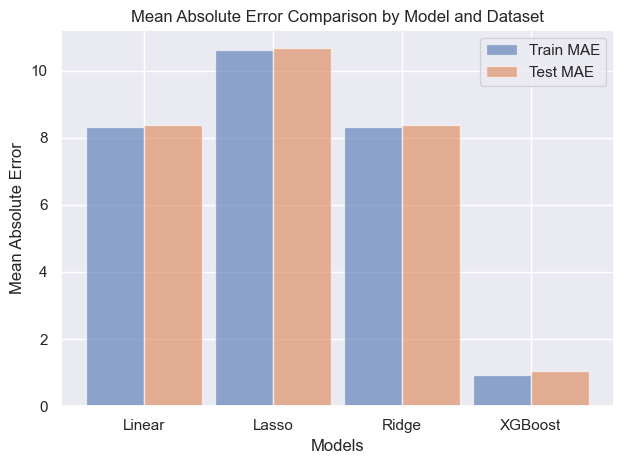

In [31]:
metrics_data = {
    'Linear': {
        'train': lr_train_MAE,
        'test': lr_test_MAE,
    },
    'Lasso': {
        'train': lasso_train_MAE,
        'test': lasso_test_MAE,
    },
    'Ridge': {
        'train': ridge_train_MAE,
        'test': ridge_test_MAE,
    },
    'XGBoost': {
        'train': xgb_train_MAE,
        'test': xgb_test_MAE,
    }
}

# Prepare the data for plotting
models = list(metrics_data.keys())
train_mae = [metrics_data[model]['train'] for model in models]
test_mae = [metrics_data[model]['test'] for model in models]

x = np.arange(len(models))  # the label locations
width = 0.45  # the width of the bars

# Plot MAE
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_mae, width, label='Train MAE', alpha=0.6)
rects2 = ax.bar(x + width/2, test_mae, width, label='Test MAE', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Mean Absolute Error Comparison by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()



fig.tight_layout()

# Show plot
plt.show()

We will consider the XGBoost Regression Model in our Project for its high performance and efficiency

+GUI

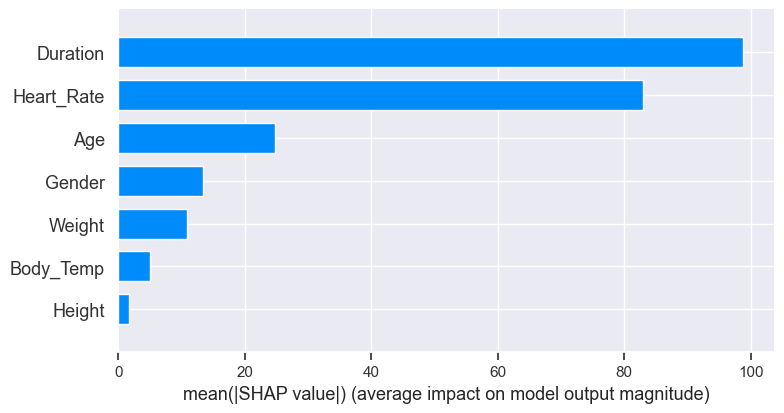

In [32]:
xgb_pipeline.fit(X_train, Y_train)

# Function to predict calories burnt
def predict_calories_burnt(gender, age, height, weight, duration, heart_rate, body_temp):
    try:
        # Create a DataFrame with the input values
        input_data = pd.DataFrame([[gender, age, height, weight, duration, heart_rate, body_temp]],
                                  columns=['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'])

        # Make prediction using the xgb_pipeline
        calories_burnt_prediction = xgb_pipeline.predict(input_data)[0]

        # Calculate SHAP values
        shap_values = xgb_explainer(input_data)

        return calories_burnt_prediction, shap_values

    except Exception as e:
        print(f"Prediction error: {e}")
        return None, None
def run_prediction(event=None):
    try:
        # Extract values from GUI inputs
        gender = 0 if entry_gender.get().strip().lower() == 'male' else 1
        age = float(entry_age.get().strip())
        height = float(entry_height.get().strip())
        weight = float(entry_weight.get().strip())
        duration = float(entry_duration.get().strip())
        heart_rate = float(entry_heart_rate.get().strip())
        body_temp = float(entry_body_temp.get().strip())

        # Create input_data as a DataFrame with the input values
        input_data = pd.DataFrame([[gender, age, height, weight, duration, heart_rate, body_temp]],
                                  columns=['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'])

        # Make prediction using xgb_pipeline
        predicted_calories = xgb_pipeline.predict(input_data)[0]

        # Calculate SHAP values
        shap_values = xgb_explainer(input_data)

        if predicted_calories is not None and shap_values is not None:
            # Update the label with the predicted result
            label_result.config(text=f"Calories burnt: {predicted_calories:.2f} kcal")

            # Calculate SHAP values in percentage importance
            shap_abs = np.abs(shap_values.values)  # Take absolute values of SHAP values
            shap_percent = shap_abs / np.sum(shap_abs) * 100  # Calculate percentage importance

            # Prepare a string to display feature importance in GUI
            feature_importance_str = "\n".join([f"{shap_values.feature_names[i]}: {shap_percent[0][i]:.2f}%" for i in range(len(shap_values.feature_names))])

            # Display feature importance in the GUI
            label_feature_importance.config(text="Feature Importance (%) :\n" + feature_importance_str)

            # Plot SHAP summary plot
            fig, ax = plt.subplots()
            shap.summary_plot(shap_values.values, plot_type='bar', feature_names=shap_values.feature_names, show=False)
            
            # Clear previous plot in frame_plot, if any
            for widget in frame_plot.winfo_children():
                widget.destroy()
            
            # Embed plot in Tkinter
            canvas = FigureCanvasTkAgg(fig, master=frame_plot)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=BOTH, expand=True)

        else:
            messagebox.showwarning("Prediction Error", "Failed to predict. Please check input values.")

    except ValueError as ve:
        messagebox.showwarning("Input Error", str(ve))
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")


# Update the GUI initialization part to include the feature importance label
# Create the main application window
root = tk.Tk()
root.title("Calorie Burn Calculator")
root.geometry("1000x800")  # Width x Height


# Style the application with the 'clam' theme
style = ttk.Style()
style.theme_use('vista')
style.configure('TLabel', font=('Helvetica', 12))
style.configure('TButton', font=('Helvetica', 12))

# Main frame
main_frame = ttk.Frame(root, padding="10 10 10 10")
main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

# Title frame
title_frame = ttk.Frame(main_frame)
title_frame.grid(row=0, column=0, columnspan=2, pady=10)

# Label to display feature importance
label_feature_importance = ttk.Label(main_frame, text="Feature Importance (%):\n")
label_feature_importance.grid(row=4, column=0, columnspan=2, padx=5, pady=10)


label_icon = ttk.Label(title_frame, text="🔥")
label_icon.grid(row=0, column=0, padx=5)

# Title label
label_title = ttk.Label(title_frame, text="Welcome to your Calorie Burns Calculator", font=('Helvetica', 16, 'bold'))
label_title.grid(row=0, column=1, padx=5)

# Input frame (Left side)
input_frame = ttk.Frame(main_frame, padding="10 10 10 10")
input_frame.grid(row=1, column=0, padx=10, pady=10, sticky=(tk.W, tk.E))

# Labels and Entries for inputs
label_gender = ttk.Label(input_frame, text="Gender (male/female):")
label_gender.grid(row=0, column=0, padx=5, pady=5, sticky=tk.E)
entry_gender = ttk.Entry(input_frame)
entry_gender.grid(row=0, column=1, padx=5, pady=5)
entry_gender.bind("<Return>", lambda event: entry_age.focus_set())  # Bind Enter key

label_age = ttk.Label(input_frame, text="Age (years):")
label_age.grid(row=1, column=0, padx=5, pady=5, sticky=tk.E)
entry_age = ttk.Entry(input_frame)
entry_age.grid(row=1, column=1, padx=5, pady=5)
entry_age.bind("<Return>", lambda event: entry_height.focus_set())  # Bind Enter key

label_height = ttk.Label(input_frame, text="Height (cm):")
label_height.grid(row=2, column=0, padx=5, pady=5, sticky=tk.E)
entry_height = ttk.Entry(input_frame)
entry_height.grid(row=2, column=1, padx=5, pady=5)
entry_height.bind("<Return>", lambda event: entry_weight.focus_set())  # Bind Enter key

label_weight = ttk.Label(input_frame, text="Weight (kg):")
label_weight.grid(row=3, column=0, padx=5, pady=5, sticky=tk.E)
entry_weight = ttk.Entry(input_frame)
entry_weight.grid(row=3, column=1, padx=5, pady=5)
entry_weight.bind("<Return>", lambda event: entry_duration.focus_set())  # Bind Enter key

label_duration = ttk.Label(input_frame, text="Duration (minutes):")
label_duration.grid(row=4, column=0, padx=5, pady=5, sticky=tk.E)
entry_duration = ttk.Entry(input_frame)
entry_duration.grid(row=4, column=1, padx=5, pady=5)
entry_duration.bind("<Return>", lambda event: entry_heart_rate.focus_set())  # Bind Enter key

label_heart_rate = ttk.Label(input_frame, text="Heart Rate (bpm):")
label_heart_rate.grid(row=5, column=0, padx=5, pady=5, sticky=tk.E)
entry_heart_rate = ttk.Entry(input_frame)
entry_heart_rate.grid(row=5, column=1, padx=5, pady=5)
entry_heart_rate.bind("<Return>", lambda event: entry_body_temp.focus_set())  # Bind Enter key

label_body_temp = ttk.Label(input_frame, text="Body Temperature (°C):")
label_body_temp.grid(row=6, column=0, padx=5, pady=5, sticky=tk.E)
entry_body_temp = ttk.Entry(input_frame)
entry_body_temp.grid(row=6, column=1, padx=5, pady=5)
entry_body_temp.bind("<Return>", lambda event: run_prediction())  # Bind Enter key

# Frame for plot (Right side)
frame_plot = ttk.Frame(main_frame)
frame_plot.grid(row=1, column=1, padx=10, pady=10, sticky=(tk.W, tk.E, tk.N, tk.S))

# Button to predict calories
button_predict = ttk.Button(main_frame, text="Predict", command=run_prediction)
button_predict.grid(row=2, column=0, columnspan=2, padx=5, pady=20)

# Label to display predicted result
label_result = ttk.Label(main_frame, text="Calories burnt : ")
label_result.grid(row=3, column=0, columnspan=2, padx=5, pady=20)

# Run the application
root.mainloop()